In [30]:
import pandas as pd

In [2]:
#Import the necessary methods from tweepy library
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [3]:
import os
from dotenv import load_dotenv
from pathlib import Path  # python3 only

In [ ]:
import re

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
env_path = Path('..') / '.env'
load_dotenv(dotenv_path=env_path)

True

In [159]:
#Environemnt variables that contains the user credentials to access Twitter API 
access_token = os.getenv("Access_token")
access_token_secret = os.getenv("Access_token_secret")
consumer_key = os.getenv("API_key")
consumer_secret = os.getenv("API_secret_key")

In [94]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [95]:
try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')

In [ ]:
#api.update_status('tweepy + oauth!') #this posts tweets for you
#public_tweets = api.home_timeline()

- **If listening to a stream**

In [ ]:
def streaming_tweets():
    #This is a basic listener that just prints received tweets to stdout.
    class StdOutListener(StreamListener):

        def on_data(self, data):
            print(data)
            return True

        def on_error(self, status):
            print(status)

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'GoT'
    stream.filter(track=['#GameofThrones'])

tweets_path = '../data/twitter_data.txt'

tweets_data = []
with open(tweets_path, "r") as f:
    for line in f:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

- **If searching for all hashtags since a certain day**

In [160]:
api = tweepy.API(auth)

In [161]:
gtweets = []
try:
    for tweet in tweepy.Cursor(api.search,q="#GameofThrones",count=100,
                               lang="en",
                               since="2019-05-18",
                               until="2019-05-19").items():
        gtweets.append(tweet)
except:
    print("Reached rate limit. Please try again later.")

Reached rate limit. Please try again later.


In [109]:
tweets_data = []
for line in gtweets:
    try:
        tweet = line._json
        tweets_data.append(tweet)
    except:
        continue

In [110]:
len(tweets_data)

12562

# Get tweets into a dataframe

In [111]:
tweets = pd.DataFrame()

In [18]:
tweets_data[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [112]:
interest = ['created_at', 'text','geo', 'coordinates','is_quote_status', 'retweet_count', 'favorite_count', 'lang']

> 'retweeted' is always False so retweet_count is more reliable.

> 'favorited' as well

In [113]:
for dim in interest:
    tweets[dim] = list(map(lambda tweet: tweet[dim], tweets_data))

In [114]:
tweets.sort_values("created_at", ascending = True).head(10)

created_at  \
12561  Sun May 26 03:38:24 +0000 2019   
12560  Sun May 26 03:38:36 +0000 2019   
12559  Sun May 26 03:38:38 +0000 2019   
12558  Sun May 26 03:38:46 +0000 2019   
12557  Sun May 26 03:39:00 +0000 2019   
12556  Sun May 26 03:39:16 +0000 2019   
12555  Sun May 26 03:39:17 +0000 2019   
12554  Sun May 26 03:39:30 +0000 2019   
12553  Sun May 26 03:39:38 +0000 2019   
12552  Sun May 26 03:39:48 +0000 2019   

                                                    text   geo coordinates  \
12561  RT @RottenTomatoes: Every season of #GameofThr...  None        None   
12560  Just watched the season finale of #GameOfThron...  None        None   
12559  Tyrion's quips the first season are just amazi...  None        None   
12558  My dog left me this cryptic message this morni...  None        None   
12557  RT @Thrones_Memes: People that don't watch #Ga...  None        None   
12556  RT @IndiiCreates: ✨ART RAFFLE✨\nThank you so m...  None        None   
12555  RT @theDALTONcastle: Yesterday, I requested my...  None        None   
12554  RT @CBR: #GameofThrones Fans Raise Over $25,00...  None        None   
12553  Well, I didn’t think I could do it. 🤭\n\nI did...  None        None   
12552  RT @thronesfacts: HBO Exec @CaseyBloys says th...  None        None   

       is_quote_status  retweet_count  favorite_count lang  
12561            False            757               0   en  
12560            False              0               3   en  
12559            False              0               0   en  
12558            False              1               1   en  
12557            False           6227               0   en  
12556            False            610               0   en  
12555            False            881               0   en  
12554            False              7               0   en  
12553            False              0               3   en  
12552            False             76               0   en

In [5]:
tweets = pd.read_csv('../data/GoTweets.csv', index_col=0)

In [68]:
tweets.shape

(12711, 8)

In [23]:
tweets.head()

created_at  \
0  Sun May 26 17:21:08 +0000 2019   
1  Sun May 26 17:21:05 +0000 2019   
2  Sun May 26 17:21:04 +0000 2019   
3  Sun May 26 17:21:03 +0000 2019   
4  Sun May 26 17:20:58 +0000 2019   

                                                text   geo coordinates  \
0  RT @vincenzolandino: Flying dragon in augmente...  None        None   
1  RT @GameOfThrones: The Last Watch.\nFrom @Jean...  None        None   
2  RT @GameOfThrones: The Last Watch.\nFrom @Jean...  None        None   
3  RT @GameOfThrones: The Last Watch.\nFrom @Jean...  None        None   
4  This woman deserved Better :(\n#GameOfThrones ...  None        None   

   is_quote_status  retweet_count  favorite_count lang  
0            False             12               0   en  
1            False           2670               0   en  
2            False           2670               0   en  
3            False           2670               0   en  
4            False              0               0   en

In [115]:
tweets = tweets.fillna('NA')

In [116]:
tweets[tweets.geo != 'NA']

created_at  \
589    Sun May 26 19:46:53 +0000 2019   
883    Sun May 26 19:31:52 +0000 2019   
1410   Sun May 26 19:02:00 +0000 2019   
1484   Sun May 26 18:58:21 +0000 2019   
1945   Sun May 26 18:34:34 +0000 2019   
2357   Sun May 26 18:12:30 +0000 2019   
2433   Sun May 26 18:07:52 +0000 2019   
2732   Sun May 26 17:54:35 +0000 2019   
3150   Sun May 26 17:33:30 +0000 2019   
4791   Sun May 26 16:28:42 +0000 2019   
4832   Sun May 26 16:27:36 +0000 2019   
5466   Sun May 26 16:11:50 +0000 2019   
6100   Sun May 26 15:54:32 +0000 2019   
6136   Sun May 26 15:51:03 +0000 2019   
6159   Sun May 26 15:48:49 +0000 2019   
6267   Sun May 26 15:39:56 +0000 2019   
6412   Sun May 26 15:30:05 +0000 2019   
7727   Sun May 26 13:47:04 +0000 2019   
8176   Sun May 26 13:02:36 +0000 2019   
8725   Sun May 26 12:05:14 +0000 2019   
9225   Sun May 26 11:05:26 +0000 2019   
9459   Sun May 26 10:36:07 +0000 2019   
9706   Sun May 26 10:02:52 +0000 2019   
9712   Sun May 26 10:02:21 +0000 2019   
9807   Sun May 26 09:50:15 +0000 2019   
10175  Sun May 26 08:57:47 +0000 2019   
10688  Sun May 26 07:48:28 +0000 2019   
11092  Sun May 26 06:53:12 +0000 2019   
11360  Sun May 26 06:13:47 +0000 2019   
12101  Sun May 26 04:31:58 +0000 2019   

                                                    text  \
589    Lots of fascia. Available now ebay for listing...   
883    Nice little haul from #mcmcomiccon #comics #ga...   
1410   Whether you loved or hated the #gameofthrones ...   
1484   Not Today. #GameofThrones #StreetArt @ Stevens...   
1945   Great #gameofthrones #runningtour this morning...   
2357   🔥I'm not a Princess. I'm a KHALEESI 🔥\nil vero...   
2433   oh Jon Snow always so perplexed that he even r...   
2732   The Lion 🦁 Guard should have been #GOT protect...   
3150   LEARN TO FIGHT LIKE ARYA STARK FROM ARCHWAY SE...   
4791   Jon Snow \n\nDay 1 balitattooexpo\nTattoo Arti...   
4832   Rhaegal\n\nDay 3 balitattooexpo\nTattoo Artist...   
5466   The Last Watch.\nFrom @JeanieFinlay, the #Game...   
6100   Rhaegal\n\nDay 3 balitattooexpo \nTattoo artis...   
6136   Jon Snow \n\nDay 1 balitattooexpo\nTattoo arti...   
6159   Stopped in at Winterfell to see how Sansa is d...   
6267   Game of thrones playmobile edition\n#gameofthr...   
6412   Maritime Festival 2019 #belfast #ships #gameof...   
7727   #gameofthrones #whitewalker #streetart #manche...   
8176   Handmade Drogon dragon egg each scale has been...   
8725   it’s May 26th but, “winter is coming” (cit.) \...   
9225   A couple of Chinese tourists have just asked w...   
9459   “What do we say to the God of death?”\n“Not to...   
9706   Game of Thrones, requested from a guest at thi...   
9712   Magical #GameofThrones #ThemedWedding ⚔️👑✨ TAG...   
9807   My new crush Jake! #gameofthrones #inuitdog @ ...   
10175  Watching how much king’s landing is pretty whe...   
10688  MCM London Comic con part 2! 😍 #mcmcomiccon #m...   
11092  #tees #tshirt #tshirtdress #tshirtdesign #tshi...   
11360  After completing Game of Thrones Nikolaj Coste...   
12101  #ancestry #history #myheritage #gameofthrones ...   

                                                     geo  \
589    {'type': 'Point', 'coordinates': [34.0522, -11...   
883    {'type': 'Point', 'coordinates': [51.50821756,...   
1410   {'type': 'Point', 'coordinates': [27.70698154,...   
1484   {'type': 'Point', 'coordinates': [53.48273625,...   
1945   {'type': 'Point', 'coordinates': [55.20223, -6...   
2357   {'type': 'Point', 'coordinates': [41.41675991,...   
2433   {'type': 'Point', 'coordinates': [41.22178762,...   
2732   {'type': 'Point', 'coordinates': [40.7114, -74...   
3150   {'type': 'Point', 'coordinates': [38.62901739,...   
4791   {'type': 'Point', 'coordinates': [-8.63854626,...   
4832   {'type': 'Point', 'coordinates': [-8.63854626,...   
5466   {'type': 'Point', 'coordinates': [10.2607682, ...   
6100   {'type': 'Point', 'coordinates': [-8.63854626,...   
6136   {'type': 'Point', 'coordinates': [-8.63854626,.

In [117]:
def saveAsCoord(x):
    try:
        return tuple(x['coordinates'])
    except:
        return 'NA'

In [118]:
tweets['geo_cor'] = tweets.geo.apply(saveAsCoord)

In [119]:
tweets['cor_cor'] = tweets.coordinates.apply(saveAsCoord)

In [120]:
tweets[tweets.geo != 'NA']

created_at  \
589    Sun May 26 19:46:53 +0000 2019   
883    Sun May 26 19:31:52 +0000 2019   
1410   Sun May 26 19:02:00 +0000 2019   
1484   Sun May 26 18:58:21 +0000 2019   
1945   Sun May 26 18:34:34 +0000 2019   
2357   Sun May 26 18:12:30 +0000 2019   
2433   Sun May 26 18:07:52 +0000 2019   
2732   Sun May 26 17:54:35 +0000 2019   
3150   Sun May 26 17:33:30 +0000 2019   
4791   Sun May 26 16:28:42 +0000 2019   
4832   Sun May 26 16:27:36 +0000 2019   
5466   Sun May 26 16:11:50 +0000 2019   
6100   Sun May 26 15:54:32 +0000 2019   
6136   Sun May 26 15:51:03 +0000 2019   
6159   Sun May 26 15:48:49 +0000 2019   
6267   Sun May 26 15:39:56 +0000 2019   
6412   Sun May 26 15:30:05 +0000 2019   
7727   Sun May 26 13:47:04 +0000 2019   
8176   Sun May 26 13:02:36 +0000 2019   
8725   Sun May 26 12:05:14 +0000 2019   
9225   Sun May 26 11:05:26 +0000 2019   
9459   Sun May 26 10:36:07 +0000 2019   
9706   Sun May 26 10:02:52 +0000 2019   
9712   Sun May 26 10:02:21 +0000 2019   
9807   Sun May 26 09:50:15 +0000 2019   
10175  Sun May 26 08:57:47 +0000 2019   
10688  Sun May 26 07:48:28 +0000 2019   
11092  Sun May 26 06:53:12 +0000 2019   
11360  Sun May 26 06:13:47 +0000 2019   
12101  Sun May 26 04:31:58 +0000 2019   

                                                    text  \
589    Lots of fascia. Available now ebay for listing...   
883    Nice little haul from #mcmcomiccon #comics #ga...   
1410   Whether you loved or hated the #gameofthrones ...   
1484   Not Today. #GameofThrones #StreetArt @ Stevens...   
1945   Great #gameofthrones #runningtour this morning...   
2357   🔥I'm not a Princess. I'm a KHALEESI 🔥\nil vero...   
2433   oh Jon Snow always so perplexed that he even r...   
2732   The Lion 🦁 Guard should have been #GOT protect...   
3150   LEARN TO FIGHT LIKE ARYA STARK FROM ARCHWAY SE...   
4791   Jon Snow \n\nDay 1 balitattooexpo\nTattoo Arti...   
4832   Rhaegal\n\nDay 3 balitattooexpo\nTattoo Artist...   
5466   The Last Watch.\nFrom @JeanieFinlay, the #Game...   
6100   Rhaegal\n\nDay 3 balitattooexpo \nTattoo artis...   
6136   Jon Snow \n\nDay 1 balitattooexpo\nTattoo arti...   
6159   Stopped in at Winterfell to see how Sansa is d...   
6267   Game of thrones playmobile edition\n#gameofthr...   
6412   Maritime Festival 2019 #belfast #ships #gameof...   
7727   #gameofthrones #whitewalker #streetart #manche...   
8176   Handmade Drogon dragon egg each scale has been...   
8725   it’s May 26th but, “winter is coming” (cit.) \...   
9225   A couple of Chinese tourists have just asked w...   
9459   “What do we say to the God of death?”\n“Not to...   
9706   Game of Thrones, requested from a guest at thi...   
9712   Magical #GameofThrones #ThemedWedding ⚔️👑✨ TAG...   
9807   My new crush Jake! #gameofthrones #inuitdog @ ...   
10175  Watching how much king’s landing is pretty whe...   
10688  MCM London Comic con part 2! 😍 #mcmcomiccon #m...   
11092  #tees #tshirt #tshirtdress #tshirtdesign #tshi...   
11360  After completing Game of Thrones Nikolaj Coste...   
12101  #ancestry #history #myheritage #gameofthrones ...   

                                                     geo  \
589    {'type': 'Point', 'coordinates': [34.0522, -11...   
883    {'type': 'Point', 'coordinates': [51.50821756,...   
1410   {'type': 'Point', 'coordinates': [27.70698154,...   
1484   {'type': 'Point', 'coordinates': [53.48273625,...   
1945   {'type': 'Point', 'coordinates': [55.20223, -6...   
2357   {'type': 'Point', 'coordinates': [41.41675991,...   
2433   {'type': 'Point', 'coordinates': [41.22178762,...   
2732   {'type': 'Point', 'coordinates': [40.7114, -74...   
3150   {'type': 'Point', 'coordinates': [38.62901739,...   
4791   {'type': 'Point', 'coordinates': [-8.63854626,...   
4832   {'type': 'Point', 'coordinates': [-8.63854626,...   
5466   {'type': 'Point', 'coordinates': [10.2607682, ...   
6100   {'type': 'Point', 'coordinates': [-8.63854626,...   
6136   {'type': 'Point', 'coordinates': [-8.63854626,.

In [121]:
tweets.isnull().sum()

created_at         0
text               0
geo                0
coordinates        0
is_quote_status    0
retweet_count      0
favorite_count     0
lang               0
geo_cor            0
cor_cor            0
dtype: int64

# EDA

In [122]:
tweets.describe()

retweet_count  favorite_count
count   12562.000000    12562.000000
mean     3536.238417        3.432972
std     11367.865340      226.916060
min         0.000000        0.000000
25%         2.000000        0.000000
50%       121.000000        0.000000
75%      4533.000000        0.000000
max    203368.000000    25325.000000

In [123]:
# dig into the top retweets
for top in tweets.sort_values("retweet_count", ascending=False).text[:5]:
    print(top)

RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW


> one tweet can be counted multiple times -> drop duplicates

**Drop Duplicate Tweets**

In [124]:
tweets['date_at'] = pd.to_datetime(tweets.created_at)

In [79]:
tweets.apply(lambda x: any([type(y) is dict for y in x]))

created_at         False
text               False
geo                 True
coordinates         True
is_quote_status    False
retweet_count      False
favorite_count     False
lang               False
geo_cor            False
cor_cor            False
date_at            False
dtype: bool

In [125]:
drop_cols = ['created_at','geo','coordinates']

In [126]:
stweets = tweets.drop(drop_cols, axis = 1)\
    .drop_duplicates([x for x in tweets.columns if x not in drop_cols+['date_at']])

In [127]:
stweets.head()

text  is_quote_status  \
0  RT @Jungle_ZA: Now that #GameOfThrones has end...            False   
1  RT @GameOfThrones: The Last Watch.\nFrom @Jean...            False   
2  RT @tukaaga: I wanna Arya In South Of Westeros...            False   
3  Less dialogue &amp; more MICHAEL BAY-EXPLOSION...            False   
4  RT @thronesfacts: HBO is releasing a 2 hour be...            False   

   retweet_count  favorite_count lang geo_cor cor_cor  \
0            682               0   en      NA      NA   
1           4531               0   en      NA      NA   
2              3               0   en      NA      NA   
3              0               0   en      NA      NA   
4            168               0   en      NA      NA   

                    date_at  
0 2019-05-26 20:16:39+00:00  
1 2019-05-26 20:16:37+00:00  
2 2019-05-26 20:16:36+00:00  
3 2019-05-26 20:16:36+00:00  
4 2019-05-26 20:16:31+00:00

In [128]:
stweets.shape

(5131, 8)

### - dig into the top retweets

In [129]:
for top in stweets.sort_values("retweet_count", ascending=False).text[:5]:
    print(top)

RT @LeoOfHyrule: I can’t stop watching this. That knife switch is clean! #GameOfThrones https://t.co/CmpPcDifgW
RT @sbazzini8: Meanwhile in Winterfell...

#GameofThrones 
 https://t.co/ioRwL9DfHg
RT @OnFireGaspy: #GameOfThrones 

well shit.... https://t.co/1BZizwdsIa
RT @kamusigi9: Best ways to kill Cersei #GameofThrones 
1. Jaime kills Cersei
2. The Night King kills Cersei
3. Arya Kills Cersei
4. Drogon…
RT @heeyvesoul: #GameOfThrones

Jon: my real name is Aegon Targaryen 

Daenerys: https://t.co/yg0xTqED5U


Text(0.5, 1.0, 'Distribution of Number of Retweets')

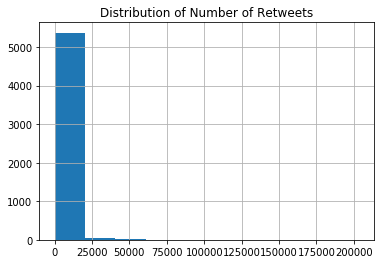

In [45]:
stweets['retweet_count'].hist()
plt.title("Distribution of Number of Retweets")

Text(0.5, 1.0, 'Distribution of Most Common Number of Retweets Occurrences')

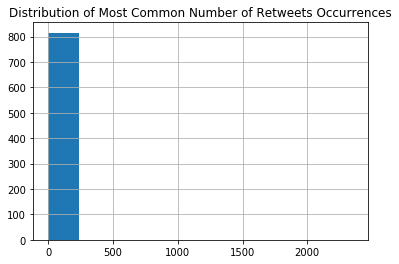

In [46]:
stweets['retweet_count'].value_counts().hist()
plt.title("Distribution of Most Common Number of Retweets Occurrences")

### - dig into the datetime -> show only after the show

In [130]:
stweets.head()

text  is_quote_status  \
0  RT @Jungle_ZA: Now that #GameOfThrones has end...            False   
1  RT @GameOfThrones: The Last Watch.\nFrom @Jean...            False   
2  RT @tukaaga: I wanna Arya In South Of Westeros...            False   
3  Less dialogue &amp; more MICHAEL BAY-EXPLOSION...            False   
4  RT @thronesfacts: HBO is releasing a 2 hour be...            False   

   retweet_count  favorite_count lang geo_cor cor_cor  \
0            682               0   en      NA      NA   
1           4531               0   en      NA      NA   
2              3               0   en      NA      NA   
3              0               0   en      NA      NA   
4            168               0   en      NA      NA   

                    date_at  
0 2019-05-26 20:16:39+00:00  
1 2019-05-26 20:16:37+00:00  
2 2019-05-26 20:16:36+00:00  
3 2019-05-26 20:16:36+00:00  
4 2019-05-26 20:16:31+00:00

In [131]:
for top in stweets.sort_values("date_at", ascending=False).text[:5]:
    print(top)

RT @Jungle_ZA: Now that #GameOfThrones has ended here are some other things you could watch. 

1. Your cholesterol 
2. Your blood sugar
3.…
RT @GameOfThrones: The Last Watch.
From @JeanieFinlay, the #GameofThrones documentary premieres tonight on @HBO. https://t.co/jmTaln8BnR
RT @tukaaga: I wanna Arya In South Of Westeros after Game Of Thrones like Alice In Wonderland. Do you? @GameOfThrones @GRRMspeaking  @Maisi…
Less dialogue &amp; more MICHAEL BAY-EXPLOSIONS, please.

#popculture #pop #culture #GameofThrones #thrones #less… https://t.co/JV1zImriZS
RT @thronesfacts: HBO is releasing a 2 hour behind-the-scenes documentary for #GameofThrones⁠ ⁠S8 called ‘The Last Watch’ tonight https://t…


### Only original tweets (not starting with RT)

In [132]:
for t in stweets[stweets.text.apply(lambda x: x[:2] != 'RT')].sort_values("retweet_count", ascending = False).head(5).text:
    print(t)

The Last Watch.
From @JeanieFinlay, the #GameofThrones documentary premieres tonight on @HBO. https://t.co/jmTaln8BnR
Happy birthday Stevie Nicks! Check out Rob Sheffield's recent interview with the goddess — where she discusses ever… https://t.co/jWIek1Fgf1
HBO is releasing a 2 hour behind-the-scenes documentary for #GameofThrones⁠ ⁠S8 called ‘The Last Watch’ tonight https://t.co/6iKRuLPbfK
The True King 👑 #GameOfThrones https://t.co/5MKb9yel3Y
Kawhi Leonard is the true King of the north 👑❄️
And soon the lord of the 7 kingdoms 

#NBAPlaoyffs #RaptorsVsBucks… https://t.co/nQ9wM97McO


In [133]:
otweets = stweets[stweets.text.apply(lambda x: x[:2] != 'RT')]

In [136]:
# percentage of orignal tweets
otweets.shape[0]/stweets.shape[0]

0.5566166439290586

Text(0.5, 1.0, 'original tweets')

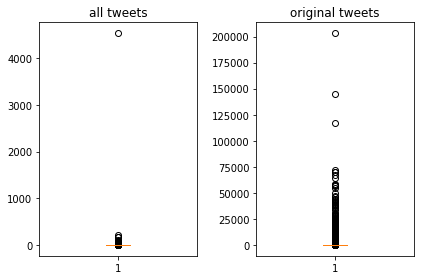

In [147]:
plt.subplot(1, 2, 1)
plt.boxplot(otweets.retweet_count)
plt.title("all tweets")
plt.subplot(1, 2, 2)
plt.boxplot(stweets.retweet_count)
plt.tight_layout()
plt.title("original tweets")

# Try getting old Tweets

In [3]:
import sys
sys.path.insert(0, '../GetOldTweets-python/')
import got3 as got

In [237]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#GameofThrones')\
                                           .setSince("2019-05-18")\
                                           .setUntil("2019-05-19")\
                                           .setMaxTweets(20000)

In [ ]:
many = got.manager.TweetManager.getTweets(tweetCriteria)

In [156]:
len(many)

20000

In [28]:
things = ['text', 'date', 'retweets', 'geo', 'favorites']

In [64]:
tweets = pd.DataFrame()

In [65]:
tweets[things[0]] = list(map(lambda tweet: tweet.text, many))
tweets[things[1]] = list(map(lambda tweet: tweet.date, many))
tweets[things[2]] = list(map(lambda tweet: tweet.retweets, many))
tweets[things[3]] = list(map(lambda tweet: tweet.geo, many))
tweets[things[4]] = list(map(lambda tweet: tweet.favorites, many))

In [66]:
tweets.head()

text                date  \
0  I hope one of the prequel series in developmen... 2019-05-17 19:59:48   
1  Jon should start his own house and called it s... 2019-05-17 19:59:44   
2  Glad your popcorn and tissues too for the gran... 2019-05-17 19:59:37   
3  # GameOfThrones Night at the @ Dbacks tonight!... 2019-05-17 19:59:30   
4  As rapidly as # GameofThrones is tanking the n... 2019-05-17 19:59:30   

   retweets geo  favorites  
0         0              0  
1         0              0  
2         0              0  
3         0              1  
4         0              0

### Cleaning the feed

In [ ]:
# drop duplicates posted seconds/minutes/hours away from each other
tweets = tweets.drop_duplicates([x for x in tweets.columns if x is not 'date'])

In [87]:
tweets.shape

(15149, 5)

In [188]:
# sum favorites & retweets
grouped_text = tweets.groupby("text").sum().reset_index()

In [189]:
# earliest date of post
grouped_date = tweets.groupby("text").date.min().reset_index()

In [190]:
ftweets = grouped_date.merge(grouped_text, on="text", how="left")

In [191]:
ftweets.shape

(15082, 4)

In [39]:
def saveAsCoord(x):
    try:
        return tuple(x['coordinates'])
    except:
        return 'NA'

In [40]:
tweets['geo_cor'] = tweets.geo.apply(saveAsCoord)

In [42]:
tweets[tweets.geo_cor != 'NA']

Empty DataFrame
Columns: [text, date, retweets, geo, favorites, geo_cor]
Index: []

In [38]:
tweets.isnull().sum()

text         0
date         0
retweets     0
geo          0
favorites    0
dtype: int64

- **only keep one for same content, different links**

In [298]:
def replaceLinks(x):
    while re.search("[pic]*?.twitter.com/[a-z\d]*", x.lower()) is not None:
        temp = re.search("[pic]*?.twitter.com/[a-z\d]*", x.lower())
        x = x.replace(x[temp.start(): temp.end()], "")
    return x

In [192]:
ftweets["no_links"] = ftweets.text.apply(replaceLinks)

In [205]:
ftweets.drop_duplicates([x for x in ftweets.columns if x not in ['text', 'date']], inplace=True)

In [206]:
ftweets.shape

(12887, 5)

In [215]:
test = ftweets.groupby("no_links").min().reset_index()

## - Most Retweeted

In [220]:
for t in test.sort_values("retweets", ascending = False).head(5).text:
    print(t)

When Jaime isn't replying to your texts. # GameOfThrones pic.twitter.com/ZS5uYHgKXO
Daenerys Targaryen: Queen of the Ashes # GameofThrones pic.twitter.com/nXCTeXVZfp
Let’s play # JeanGrey or # SansaStark with @ SophieT! @ HBO # GameofThrones # DarkPhoenixpic.twitter.com/JQLlSCHXzq
Fall back. View the Beautiful Death for "The Bells" by @ RobertMBall for the final season of # GameofThrones: https://itsh.bo/30qSNgK pic.twitter.com/s4ZguA0IGZ
I wrote about why the downturn of storytelling in # GameofThrones also explains why it's hard for us to deal with Facebook, YouTube, AI, etc. The show was a rare beast: a sociological narrative in a world dominated by psychological/individualized ones. https://blogs.scientificamerican.com/observations/the-real-reason-fans-hate-the-last-season-of-game-of-thrones/ …pic.twitter.com/x1b2dKZkOT


## - Most Favorited

In [219]:
for t in test.sort_values("favorites", ascending = False).head(5).text:
    print(t)

When Jaime isn't replying to your texts. # GameOfThrones pic.twitter.com/ZS5uYHgKXO
Let’s play # JeanGrey or # SansaStark with @ SophieT! @ HBO # GameofThrones # DarkPhoenixpic.twitter.com/JQLlSCHXzq
Fall back. View the Beautiful Death for "The Bells" by @ RobertMBall for the final season of # GameofThrones: https://itsh.bo/30qSNgK pic.twitter.com/s4ZguA0IGZ
Daenerys Targaryen: Queen of the Ashes # GameofThrones pic.twitter.com/nXCTeXVZfp
Leaked footage from the finale # GameofThrones # ForTheThrone # GameofThronesFinale # Cerseipic.twitter.com/3z3xFgzU59


## - Most Recent Tweets

In [221]:
for t in test.sort_values("date", ascending = False).head(5).text:
    print(t)

I hope one of the prequel series in development is called # KeepingUpWithTheTargaryens (Pretty sure there's already a parody) # GameOfThrones # Targaryen # Dracarys gameofthrones https://www.instagram.com/p/BxlT1KsFDZB/?igshid=16py5kft3zj1n …
Jon should start his own house and called it stargaryen # GameofThrones
Glad your popcorn and tissues too for the grand finale this Sunday night on your TV's everywhere. @ JeffreyBrown # GameOfThrones @ JudyWoodruff @ LisaDNews @ IAmAmnaNawaz @ sarajust @ hari @ PBS @ NewsHour @ wetatvfm @ ThirteenWNET @ CPBmedia # PBSNEWShttps://twitter.com/NewsHour/status/1129532869859131393 …
As rapidly as # GameofThrones is tanking the new season 7 of @ SHO_Homeland is rocking! What a story line & # clairedanes just brilliant
# GameOfThrones Night at the @ Dbacks tonight! # RattleOnpic.twitter.com/AhRZRpFNNv – bei Chase Field


## - Combine retweets & favorites since they are quite correlated

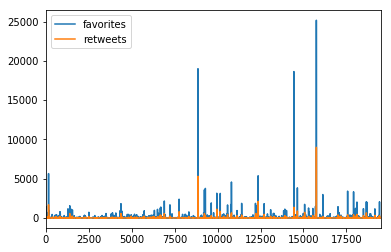

In [123]:
test[['favorites', 'retweets']].plot()

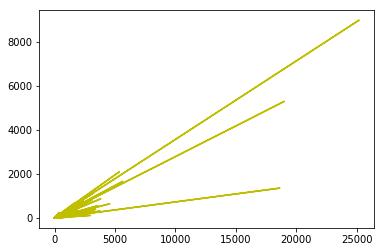

In [121]:
plt.plot(test.favorites, test.retweets, "y")

In [124]:
test[['favorites', 'retweets']].corr()

favorites  retweets
favorites   1.000000  0.910947
retweets    0.910947  1.000000

In [125]:
test['popularity'] = test.favorites + test.retweets

Index(['no_links', 'text', 'date', 'retweets', 'favorites', 'popularity'], dtype='object')

## - Mentioning main characters

In [126]:
mains = ["|".join(['daenerys Targaryen', "dany", "daenerys", "khaleesi"]), 
         "|".join(['jon snow', 'jon']), 
         "|".join(['sansa Stark', 'sansa']), 
         "|".join(['arya Stark', 'arya']),
         "|".join(["bran Stark", "brandon Stark", "three-eyed raven", "bran"]),
         "|".join(['tyrion', 'tyrion lannister'])]

In [127]:
for char in mains:
    print(char[0],test[test.no_links.str.lower().str.contains(char)].shape[0])

d 1178
j 1491
s 598
a 700
b 1293
t 528


In [234]:
for x in test[test.no_links.str.lower().str.contains(mains[0])].sort_values("popularity", ascending=False).head(5).text:
    print(x)

Daenerys Targaryen: Queen of the Ashes # GameofThrones pic.twitter.com/nXCTeXVZfp
“Me encantó esta última temporada de GoT, incluyendo a Dany haciendo destrozos x todo Kings Landing. Ha habido mucha negatividad acerca d la conclusión, pero creo q es sólo porque la gente no quiere ningún final. Pero ya sabes lo q dicen: todas las cosas buenas…” # GameofThrones pic.twitter.com/BwBIM4D5U4
This week we saw Drogon at his most ferocious — here's how @ HBO created Dany's dragons in # GameOfThrones pic.twitter.com/H6y6K2zItD
Updated odds to rule Westeros # GameofThrones: Bran -450 Sansa +500 Gendry +1000 Jon (Aegon) +1000 Tyrion +1500 Daenerys +2000 Arya +3500 Jon & Daenerys' baby +5000 Samwell +7500 Brienne +20000 Bronn +20000 Davos +20000 Yara +25000 Daario +50000 Gilly +50000 Tormund +50000
Sim, claro, só a Daenerys é fria e louca # GameofThrones # DaenerysTargaryenpic.twitter.com/9quNAfTBem


In [235]:
for x in test[test.no_links.str.lower().str.contains(mains[1])].sort_values("popularity", ascending=False).head(5).text:
    print(x)

Sean Bean said out of all the Stark children (including Jon) he thinks Arya will be the one to see the end of the show alive. He even went on to say that with her assassin training, she will end up on the Iron Throne (via @ mashable) # GameofThrones pic.twitter.com/09BX8mjWMS
Sean Bean confessed that Arya is one of his favourite characters and he would like to see Arya or Jon or Sansa on the Iron Throne # GameOfThrones pic.twitter.com/doUP6AOEHr
Updated odds to rule Westeros # GameofThrones: Bran -450 Sansa +500 Gendry +1000 Jon (Aegon) +1000 Tyrion +1500 Daenerys +2000 Arya +3500 Jon & Daenerys' baby +5000 Samwell +7500 Brienne +20000 Bronn +20000 Davos +20000 Yara +25000 Daario +50000 Gilly +50000 Tormund +50000
Antes del cap final, les voy a contar algo de # GameofThrones que por lo general es pasado por alto, pero que muestra la gran complejidad de la serie: y es su música. En especial ‘Truth’, la canción de amor de Jon y Daenerys. Ponganse unos buenos audífonos porque abro hilo: p

## - Try seperating Spanish into its own
using #juegodetronos

In [243]:
spanish = test[test.text.str.contains("#juegodetronos")]

In [266]:
test = test[~test.text.str.contains("#juegodetronos")].reset_index(drop=True)

## - Hashtags Analysis

In [199]:
from functools import reduce

In [194]:
def findHashtags(x):
    new = re.findall("#[a-z]*", x.lower())
    return new

In [195]:
new = test.text.apply(findHashtags)

In [198]:
all_words = []

In [200]:
all_words = reduce(lambda x, y: x+y, new.values.tolist())

In [203]:
hashtags = list(set(all_words))

In [235]:
check = sorted(hashtags, key=len, reverse=True)

In [209]:
hash_counts = [(k,v) for k,v in Counter(all_words).items()]

In [214]:
sorted_x = sorted(dict(hash_counts).items(), key=lambda kv: kv[1])

In [223]:
sorted_x[-10:]

[('#juegodetronos', 249),
 ('#gameofthronesfinalepic', 322),
 ('#jonsnow', 336),
 ('#gots', 340),
 ('#gotfinal', 389),
 ('#gotfinale', 527),
 ('#gameofthonesfinale', 1174),
 ('#gameofthronesfinale', 1628),
 ('#got', 2193),
 ('#gameofthrones', 19554)]

Text(0.5, 1.0, 'Number of Mentions for the Top 10 Hashtags')

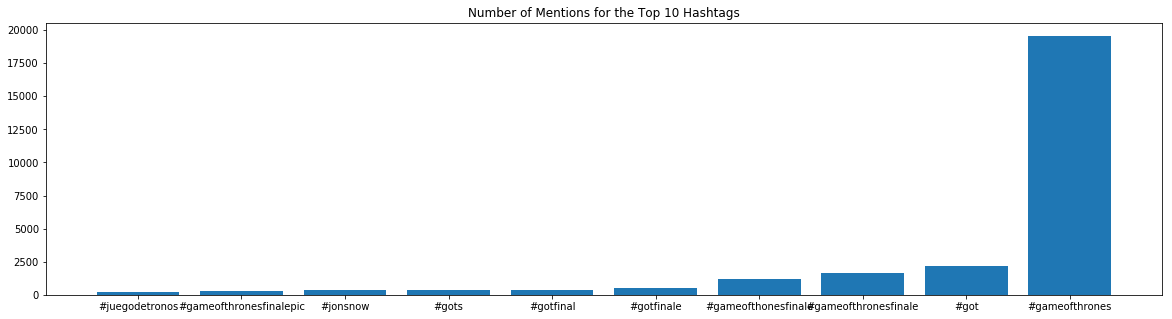

In [318]:
plt.figure(figsize=(20,5))
plt.bar([x[0] for x in sorted_x[-10:]], [x[1] for x in sorted_x[-10:]])
plt.title("Number of Mentions for the Top 10 Hashtags")

## - Topic Analysis

In [128]:
import re, string
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from collections import Counter

In [129]:
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

In [130]:
# create English stop words list (you can always define your own stopwords)
stop_words = set(stopwords.words('english'))

In [131]:
# Function to remove stop words from sentences & lemmatize verbs and nouns. 
def clean(doc, lem = True):
    tokenized = word_tokenize(doc.lower())
    stop_free = [x for x in tokenized if not re.fullmatch('[' + string.punctuation + ']+', x) and x not in stop_words]
    if lem:
        lemma_verb = [lemmatizer.lemmatize(word,'v') for word in stop_free]
        lemma_noun = [lemmatizer.lemmatize(word,'n') for word in lemma_verb]
        #y = [s for s in lemma_noun if len(s) > 2]
        return lemma_noun
    else:
        return stop_free

**Step 1: Clean the corpus**
- convert the text reviews to lowercase
- remove #gameofthrones (every tweet has it)
- remove reviews with less than 3 tokens

In [262]:
def removeHashtags(x):
    for i in range(len(check)-1):
        hashed = check[i]
        try:
            x = x.lower().replace(hashed, "")
        except:
            next
    return x

In [292]:
links = re.compile('[https?]*?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+[/?\w+=?\w+]*')
def removeLinks(x):
    while re.search(links, x.lower()) is not None:
        temp = re.search(links, x.lower())
        x = x.replace(x[temp.start(): temp.end()], "")
    return x

In [263]:
for x in test.head().no_links.apply(removeHashtags):
    print(x)

! spoilers ! .... bon en gros, tout le monde rentre chez soi grâce à un dragon philosophe sur la vacuité du pouvoir et à un conseil de classe mené par un nain condamné à mort. ok. 
!!got spoiler alert!! ... old meme, feels relevant now          @game of… https://www.instagram.com/p/bxtaabqddrn/?igshid=1tquh6sb8onjn …
"  'un finali iyiydi yaa" diyenlere yapmak istediğim; ://twitter.com/itisdxvid/status/1129422372967256067 …
"  bitsin artık" der gibi bitti.
" ...¡¡¡the queen in the north!!!"  


In [264]:
for x in test.head().no_links.apply(removeLinks):
    print(x)

! SPOILERS ! .... Bon en gros, tout le monde rentre chez soi grâce à un dragon philosophe sur la vacuité du pouvoir et à un conseil de classe mené par un nain condamné à mort. Ok. #GameOfThrones
!!GoT SPOILER ALERT!! ... old meme, feels relevant now #SureLordOfTheRingsIsBetter #PoorMansWillowIfYouKnow #IsWinterOverNow #WhenDoesSummerCome #JusticeForSeanBean #GoTbanter #GoT #GameOfThrones #Banter @Game Of…  …
" #GameOfThrones 'un finali iyiydi yaa" diyenlere yapmak istediğim; #GameOfThronesFinale …
" #GameofThrones bitsin artık" der gibi bitti.
" ...¡¡¡THE QUEEN IN THE NORTH!!!" #GameOfThrones #GOTfinal


In [284]:
test['pure_text'] = test.text.apply(removeHashtags)

In [299]:
test['pure_text'] = test.pure_text.apply(replaceLinks)

In [293]:
test['pure_text'] = test.pure_text.apply(removeLinks)

In [301]:
review = test.pure_text.values.tolist()

In [302]:
long_review = [x for x in review if len(x) > 3]

In [303]:
len(review), len(long_review)

(19430, 19207)

- tokenize them
- remove punctuations, and stop words.
- filter the terms which occurred less than 10 times in your documents (i.e., reviews).
- with and without lemmatization

In [304]:
# with lemmatization
skim_review = [clean(doc.strip()) for doc in long_review]

In [ ]:
# without lemmatization
ori_review = [clean(doc.strip(), False) for doc in long_review]

**Step 2: Create the dictionary**

After you cleaned your corpus, you will create the term dictionary.

Note: There are multiple languages

-With lemmatization

In [305]:
from collections import Counter

freq = [(k,v) for k,v in Counter([item for sublist in skim_review for item in sublist]).items() 
        if v >= 10 and re.search('\d+', k) is None]

dictionary = [x[0] for x in freq]

In [ ]:
-Without lemmatization

In [50]:
ori_freq = [(k,v) for k,v in Counter([item for sublist in ori_review for item in sublist]).items() 
            if v >= 10 and re.search('\d+', k) is None]
In [51]:
ori_dictionary = [x[0] for x in ori_freq]

**Step 3: DT**

Convert the list of documents in your corpus into Document-Term Matrix using the dictionary prepared at Step 2 (again, a term is a word).

-With lemmatization

In [306]:
Dic = corpora.Dictionary([dictionary])
corpus = [Dic.doc2bow(doc_clean) for doc_clean in skim_review]

In [ ]:
-Without lemmatization

In [56]:
ori_Dic = corpora.Dictionary([ori_dictionary])
In [57]:
ori_corpus = [Dic.doc2bow(doc_clean) for doc_clean in ori_review]

**Step 4: Run the LDA model on the document-term matrix**
    
Here you have to run LDA with the following parameters: number of topics (k = 10), number of passes (pass = 20), and number of iterations (iterations = 2000).

-With lemmatization

In [307]:
# LDA model needs many iterations/passes and a large corpus to work well
# must define the number of topics you want to extract from the corpus
ldamodel = LdaModel(corpus, num_topics=10, id2word = Dic, passes=20, iterations=200)

In [ ]:
-Without lemmatization
# LDA model needs many iterations/passes and a large corpus to work well
# must define the number of topics you want to extract from the corpus
ori_ldamodel = LdaModel(ori_corpus, num_topics=10, id2word = ori_Dic, passes=20, iterations=2000)

**Step 5: For each of the k topics, print the top 10 words**

In [308]:
ori_tops = ldamodel.print_topics(num_topics=10, num_words=10)

In [309]:
pd.DataFrame([re.findall("\"\w*[.']?\w*\"", x[1]) for x in ori_tops])

0           1                2         3          4         5  \
0  "throne"      "game"          "final"     "bir"     "part"  "finale"   
1       "и"        "من"             "не"       "я"        "в"     "что"   
2      "de"        "le"             "la"      "et"        "à"       "و"   
3  "better"     "thank"  "gameofthrones"    "love"      "это"   "ghost"   
4     "end"    "season"          "watch"    "show"  "episode"    "last"   
5  "tyrion"  "westeros"            "get"  "people"   "become"    "bran"   
6     "jon"      "bran"           "king"      "'s"    "queen"    "arya"   
7      "de"       "que"              "e"      "da"    "final"     "não"   
8      "di"       "che"              "e"       "è"       "il"     "non"   
9      "de"       "que"             "la"      "el"    "final"      "en"   

           6           7        8         9  
0    "visto"       "hbo"     "bu"   "today"  
1       "في"   "المسلسل"  "every"   "نهاية"  
2       "je"       "que"   "pour"      None  
3  "deserve"     "thing"   "come"      None  
4      "get"        "'s"   "like"      None  
5     "king"        None     None      None  
6     "snow"        "go"  "sansa"    "dany"  
7      "foi"         "é"     "um"      "eu"  
8       "la"  "daenerys"     "mi"  "finale"  
9      "los"        "lo"     "se"      "un"

## - Sentiment Analysis